In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from neuropacks import ECOG
from pyuoi.decomposition import UoI_NMF
from sklearn.cluster import DBSCAN
from sklearn.decomposition import NMF

%matplotlib inline

In [2]:
data_path = '/Users/psachdeva/data/ECoG/data/r32_b7.mat'
grid_path = '/Users/psachdeva/data/ECoG/data/grdid.mat'
ecog = ECOG(
    data_path=data_path,
    grid_path=grid_path
)

In [3]:
Y = ecog.get_response_matrix(
    bounds=(40, 60),
    band='HG'
)

In [4]:
# kill the dead indices
dead_indices = [19, 21, 0]
Y[:, dead_indices] = 0

In [5]:
Y = Y + np.abs(np.min(Y, axis=0, keepdims=True))
# Y[Y < 0] = 0

In [41]:
uoi = UoI_NMF(
    n_boots=20,
    ranks=[25],
    nmf_max_iter=1000)
uoi.fit(Y)

UoI_NMF(db_algorithm=None, db_eps=None, db_leaf_size=None, db_metric=None,
        db_metric_params=None, db_min_samples=None, n_boots=20,
        nmf_beta_loss=None, nmf_init=None, nmf_max_iter=None, nmf_solver=None,
        nmf_tol=None, random_state=None, ranks=(25,))

In [21]:
uoi.components_[0].shape[0] / 16

8.0

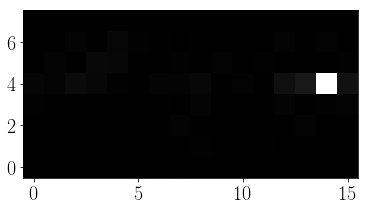

In [36]:
plt.imshow(uoi.components_[14].reshape(8, 16))

In [37]:
nmf = NMF(
    n_components=uoi.components_.shape[0],
    beta_loss='kullback-leibler',
    solver='mu',
    max_iter=1000,
    init='random'
)
nmf.fit(Y)

NMF(alpha=0.0, beta_loss='kullback-leibler', init='random', l1_ratio=0.0,
    max_iter=1000, n_components=19, random_state=None, shuffle=False,
    solver='mu', tol=0.0001, verbose=0)

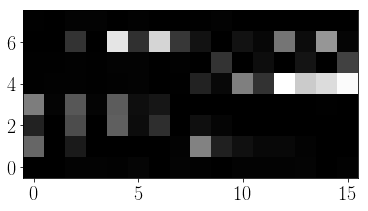

In [40]:
plt.imshow(nmf.components_[2].reshape(8, 16))

In [101]:
fits = h5py.File('ecog_nmf', 'a')
fits['uoi_zeroed'] = uoi.components_
fits['nmf_zeroed'] = nmf.components_
fits.close()